In [87]:
#Let's start with importing necessary Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle



import warnings
warnings.filterwarnings ('ignore')

In [88]:
 df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Japan_used_cars_datasets.csv') # Reading the data file

In [89]:
df

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
...,...,...,...,...,...,...,...,...,...,...,...
2313,2331,1400,toyota,vitz,2009,121000,996,at,2wd,rhd,gasoline
2314,2332,1400,toyota,estima,2003,101000,3000,at,2wd,rhd,gasoline
2315,2333,1400,subaru,r2,2005,101000,660,cvt,2wd,rhd,gasoline
2316,2334,1400,honda,z,2000,170000,660,at,4wd,rhd,gasoline


<font face = "Verdana" size = "4"> 1)  Preprocessing

<font face = "Verdana" size = "3"> 1.1)  Check shape of data

In [90]:
df.shape

(2318, 11)

<font face = "Verdana" size = "3"> 1.2) Check Data info

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2318 non-null   int64 
 1   price            2318 non-null   int64 
 2   mark             2318 non-null   object
 3   model            2318 non-null   object
 4   year             2318 non-null   int64 
 5   mileage          2318 non-null   int64 
 6   engine_capacity  2318 non-null   int64 
 7   transmission     2318 non-null   object
 8   drive            2318 non-null   object
 9   hand_drive       2318 non-null   object
 10  fuel             2318 non-null   object
dtypes: int64(5), object(6)
memory usage: 199.3+ KB


<font face = "Verdana" size = "3"> 1.3)Check for any missing value in data set and treat it

In [92]:
df.isna().sum()

id                 0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

<font face = "Verdana" size = "3"> 1.4) Exploring the descriptive statistics of the variables

In [93]:
df.describe()

,id,price,year,mileage,engine_capacity
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,1169.047023,971.522433,2005.972390,100013.194996,1507.010785
std,674.460724,288.673112,3.698863,52512.478883,549.585170
min,0.000000,80.000000,1979.000000,2000.000000,9.000000
25%,583.250000,776.000000,2004.000000,67000.000000,1300.000000
50%,1168.500000,1000.000000,2006.000000,94000.000000,1490.000000
75%,1753.750000,1213.000000,2009.000000,124000.000000,1800.000000
max,2335.000000,1400.000000,2015.000000,790000.000000,12340.000000


<font face = "Verdana" size = "3"> 1.5) To check if there are any outliers

In [94]:
# To check if there are any outliers
# Here we conclude that we don't have any outliers as the values are gradually increasing!
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,id,price,year,mileage,engine_capacity
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,1169.047023,971.522433,2005.972390,100013.194996,1507.010785
std,674.460724,288.673112,3.698863,52512.478883,549.585170
min,0.000000,80.000000,1979.000000,2000.000000,9.000000
25%,583.250000,776.000000,2004.000000,67000.000000,1300.000000
50%,1168.500000,1000.000000,2006.000000,94000.000000,1490.000000
75%,1753.750000,1213.000000,2009.000000,124000.000000,1800.000000
90%,2101.300000,1320.000000,2011.000000,158000.000000,2000.000000
95%,2219.150000,1370.000000,2011.000000,181000.000000,2490.000000
99%,2311.830000,1400.000000,2013.000000,244008.360000,3000.000000


<font face = "Verdana" size = "3"> 1.6)Feature Extraction

In [95]:
# Creating a new feature called total no. of years old my car,bcz It's important to know how many years old the car is.
df['Car_age'] = 2020-df["year"]

#It's time to drop the Year column after the needed info is derived.
df.drop(labels="year",axis=1,inplace=True)

In [96]:
df

,id,price,mark,model,mileage,engine_capacity,transmission,drive,hand_drive,fuel,Car_age
0,0,80,nissan,march,80000,1240,at,2wd,rhd,gasoline,17
1,1,110,nissan,march,53000,1200,at,2wd,rhd,gasoline,10
2,2,165,nissan,lafesta,47690,2000,at,2wd,rhd,gasoline,15
3,3,190,toyota,avensis,130661,1990,at,2wd,rhd,gasoline,12
4,4,190,daihatsu,mira,66300,660,at,2wd,rhd,gasoline,14
...,...,...,...,...,...,...,...,...,...,...,...
2313,2331,1400,toyota,vitz,121000,996,at,2wd,rhd,gasoline,11
2314,2332,1400,toyota,estima,101000,3000,at,2wd,rhd,gasoline,17
2315,2333,1400,subaru,r2,101000,660,cvt,2wd,rhd,gasoline,15
2316,2334,1400,honda,z,170000,660,at,4wd,rhd,gasoline,20


<font face = "Verdana" size = "4"> 2) Data exploration<br>
 <font face = "Verdana" size = "3">   2.1) Data Exploration & Visualization

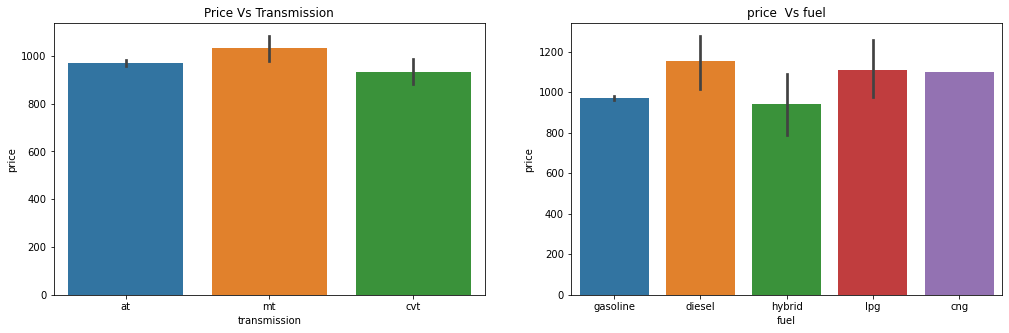

In [97]:
#Seller Type, Transmission nd Fuel Type Visualization with target variable
plt.figure(figsize=[17,5])


plt.subplot(1,2,1)
sns.barplot(df['transmission'],df['price'])
plt.title('Price Vs Transmission')

plt.subplot(1,2,2)
sns.barplot(df['fuel'],df['price'])
plt.title('price  Vs fuel')

plt.show()

 <font face = "Verdana" size = "4"> Observation note <br>
  <font face = "Verdana" size = "3">  1)  It can be observed that Selling Price would be higher for cars that are mt and at <br>
   <font face = "Verdana" size = "3">  2) Selling Price of cars with Fuel Type of Diesel is higher than hybrid fuel *

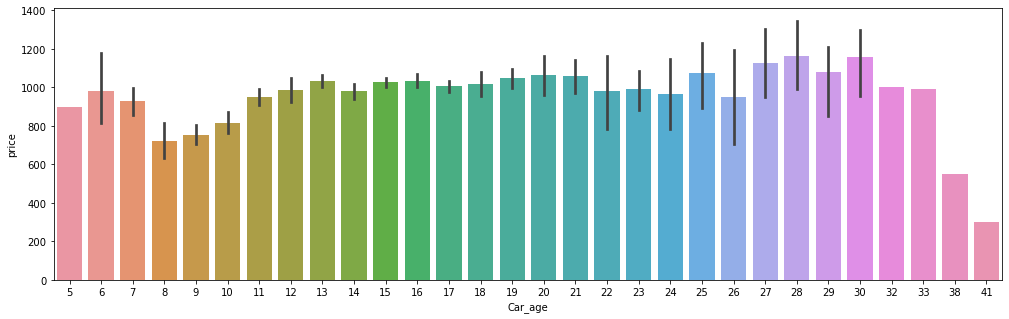

In [98]:
plt.figure(figsize=[17,5])

plt.subplot(1,1,1)
sns.barplot(df['Car_age'],df['price'])

plt.show()

 <font face = "Verdana" size = "4"> 3) Dealing With Categorical Variables
    <br><font face = "Verdana" size = "3"> 3.1) Here's our categorical column

In [99]:
# Here's our categorical column
print(df['fuel'].unique())
print(df['mark'].unique())
print(df['transmission'].unique())
print(df['drive'].unique())

['gasoline' 'diesel' 'hybrid' 'lpg' 'cng']
['nissan' 'toyota' 'daihatsu' 'volkswagen' 'mazda' 'honda' 'subaru'
 'mercedes-benz' 'kubota' 'mitsubishi' 'suzuki' 'bmw' 'chrysler' 'smart'
 'gm' 'opel' 'isuzu' 'land rover' 'peugeot' 'hyundai' 'kia motors' 'audi'
 'citroen' 'mitsuoka' 'volvo' 'ford' 'hino' 'jaguar']
['at' 'mt' 'cvt']
['2wd' '4wd' 'awd']


In [100]:
# In Car Name column There are multiple unique name. 
# That's something really hard to implement and a regression that would mean more than 300 dummies, so we simply drop this column
df = df.drop(labels=['mark','model','id'], axis=1)

 <font face = "Verdana" size = "3"> 3.2)  Dealing With Categorical Variables, creagting dummie

In [101]:
# Dealing With Categorical Variables, creagting dummie
clean_data = pd.get_dummies(df,drop_first=True)
clean_data.head()

,price,mileage,engine_capacity,Car_age,transmission_cvt,transmission_mt,drive_4wd,drive_awd,hand_drive_lhd,hand_drive_rhd,fuel_diesel,fuel_gasoline,fuel_hybrid,fuel_lpg
0,80,80000,1240,17,0,0,0,0,0,1,0,1,0,0
1,110,53000,1200,10,0,0,0,0,0,1,0,1,0,0
2,165,47690,2000,15,0,0,0,0,0,1,0,1,0,0
3,190,130661,1990,12,0,0,0,0,0,1,0,1,0,0
4,190,66300,660,14,0,0,0,0,0,1,0,1,0,0


<font face = "Verdana" size = "4"> 4) Checking Multicollinearity Using VIF

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = clean_data[['mileage','engine_capacity','Car_age',
                        'transmission_cvt','transmission_mt','drive_4wd','drive_awd',
                       'hand_drive_lhd','hand_drive_rhd','fuel_diesel','fuel_gasoline','fuel_hybrid','fuel_lpg']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,5.117286,mileage
1,9.584550,engine_capacity
2,19.198850,Car_age
3,1.015028,transmission_cvt
4,1.374979,transmission_mt
5,1.209316,drive_4wd
6,1.051566,drive_awd
7,9.262407,hand_drive_lhd
8,1239.601959,hand_drive_rhd
9,9.833226,fuel_diesel


<font face = "Verdana" size = "3"> 4.2) removing some correlated feature

In [103]:
# Car_age nd fuel_gasoline,hand_drive_rhd,hand_drive_lhd feature,engine_capacity has high VIF
data_no_multicolinearity = clean_data.drop(['fuel_gasoline','hand_drive_rhd','mileage'],axis=1)

<font face = "Verdana" size = "3"> 4.3) cheking again after removing some correlated feature

In [104]:
# cheking again after removing some correlated feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = clean_data[['engine_capacity','Car_age',
                        'transmission_cvt','transmission_mt','drive_4wd','drive_awd',
                       'hand_drive_lhd','fuel_diesel','fuel_hybrid','fuel_lpg']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,7.389716,engine_capacity
1,7.980289,Car_age
2,1.014466,transmission_cvt
3,1.349703,transmission_mt
4,1.170752,drive_4wd
5,1.050636,drive_awd
6,2.032449,hand_drive_lhd
7,2.076935,fuel_diesel
8,1.000763,fuel_hybrid
9,1.006345,fuel_lpg


<font face = "Verdana" size = "3">  Now its look good, We have VIF < 10 and hence there is no Multicollinearity occurrence in our model.*

<font face = "Verdana" size = "4"> 5) Feature Selection

<AxesSubplot:>

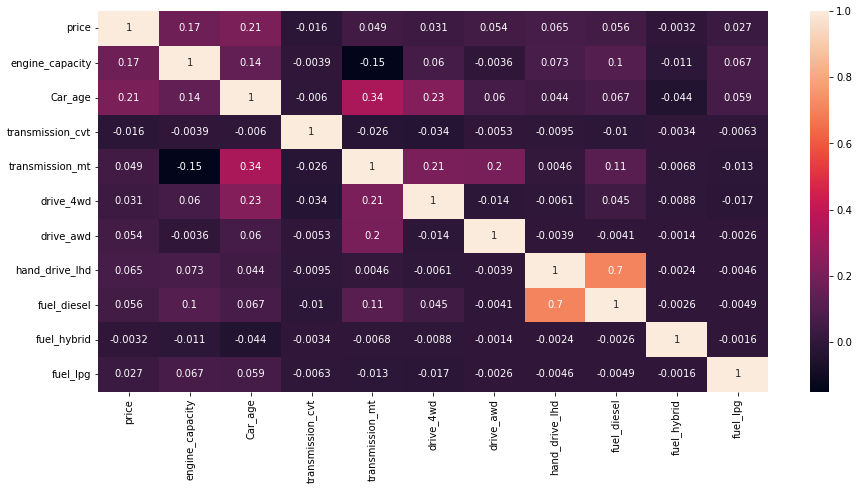

In [105]:
# correlation heat map
plt.figure(figsize=[15,7])
sns.heatmap(data_no_multicolinearity.corr(), annot=True)

<font face = "Verdana" size = "4">*P-Value* - P values are one of the best ways to determine if a variable is redundant(usefull or not) but they provide no information.<br>
If a variable has a p-values >0.05, we can disregard it.

In [106]:
#F-regression create simple linear regression of each feature
#This method would calculate the F statistic for each of those regressions and return the respective p values
from sklearn.feature_selection import f_regression,SelectKBest

X = data_no_multicolinearity.drop('price',axis=1)
y = data_no_multicolinearity['price']

f_regression(X,y)

p_values = f_regression(X,y)[1]

p_values.round(3) # This output in scincetific notation array lets convert them using 'round' method

array([0.   , 0.   , 0.437, 0.018, 0.138, 0.01 , 0.002, 0.007, 0.877,
       0.2  ])

In [108]:
# Creating summary table
model_summry = pd.DataFrame(data=['engine_capacity','Car_age',
                        'transmission_cvt','transmission_mt','drive_4wd','drive_awd',
                       'hand_drive_lhd','fuel_diesel','fuel_hybrid','fuel_lpg'], columns=['Features'])
model_summry['p-values'] = p_values.round(3)
model_summry.head()

,Features,p-values
0,engine_capacity,0.000
1,Car_age,0.000
2,transmission_cvt,0.437
3,transmission_mt,0.018
4,drive_4wd,0.138


<font face = "Verdana" size = "3">Dropping the "transmission_cvt"  nd 'drive_4wd' feature which has p-value>0.05 resulting in insigificant. It means that Owner variable is not contributing that much in target variable

<font face = "Verdana" size = "3"> Feature Importance

<font face = "Verdana" size = "3">Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards our Target variable.

In [110]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

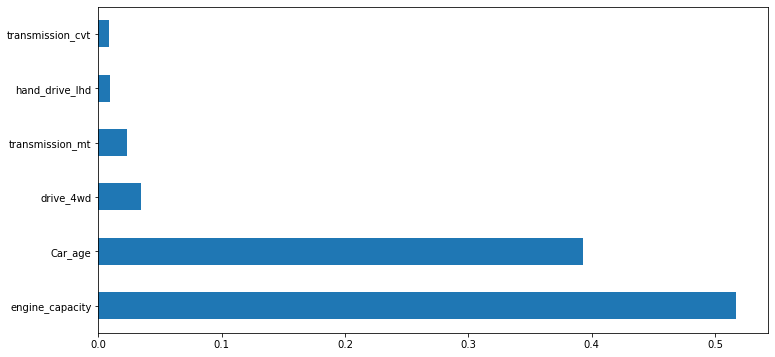

In [111]:
# plot graph of feature importances for better visualization
plt.figure(figsize=[12,6])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [112]:
print(feat_importances.sort_values(ascending=False))

engine_capacity     0.517124
Car_age             0.392626
drive_4wd           0.034584
transmission_mt     0.022997
hand_drive_lhd      0.009207
transmission_cvt    0.008892
fuel_diesel         0.006271
drive_awd           0.005521
fuel_lpg            0.001951
fuel_hybrid         0.000828
dtype: float64


In [113]:
data_no_multicolinearity.columns

Index(['price', 'engine_capacity', 'Car_age', 'transmission_cvt',
       'transmission_mt', 'drive_4wd', 'drive_awd', 'hand_drive_lhd',
       'fuel_diesel', 'fuel_hybrid', 'fuel_lpg'],
      dtype='object')

In [114]:
# Selecting useful features.
final_df = data_no_multicolinearity[['price', 'engine_capacity', 'Car_age', 'transmission_cvt',
       'transmission_mt', 'drive_4wd', 'drive_awd', 'hand_drive_lhd',
       'fuel_diesel', 'fuel_hybrid', 'fuel_lpg']]

In [136]:
final_df.head()

,price,engine_capacity,Car_age,transmission_cvt,transmission_mt,drive_4wd,drive_awd,hand_drive_lhd,fuel_diesel,fuel_hybrid,fuel_lpg
0,80,1240,17,0,0,0,0,0,0,0,0
1,110,1200,10,0,0,0,0,0,0,0,0
2,165,2000,15,0,0,0,0,0,0,0,0
3,190,1990,12,0,0,0,0,0,0,0,0
4,190,660,14,0,0,0,0,0,0,0,0


<font face = "Verdana" size = "4"> Model Development
    <br>Declaring dependent and independent variable

In [137]:
X = final_df.drop('price', axis=1)
y = final_df['price']

<font face = "Verdana" size = "4"> Feature Scaling

In [138]:
# feature scallng on training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X[['engine_capacity','Car_age']])

StandardScaler()

In [139]:
input_scaled = scaler.transform(X[['engine_capacity','Car_age']])
scaled_data = pd.DataFrame(input_scaled, columns=['engine_capacity','Car_age'])

In [140]:
X_scaled =scaled_data.join(X.drop(['engine_capacity','Car_age'],axis=1))

<font face = "Verdana" size = "4">Training and Testing Data

<font face = "Verdana" size = "4"> LinearRegression

In [141]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=365)

In [142]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [143]:
# Model Building
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Training Model
lr.fit(x_train,y_train)

# Model Summary
y_pred_lr = lr.predict(x_test)

r_squared = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("R_squared :",r_squared)

R_squared : 0.08377626361472723


<font face = "Verdana" size = "4"> Random Forest Regressor Model

In [144]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Training Model
rf.fit(x_train,y_train)

# Model Summary
y_pred_rf = rf.predict(x_test)

r_squared = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("R_squared :",r_squared)

R_squared : 0.11411305568323826


<font face = "Verdana" size = "4"> GBT Regressor Model

In [145]:
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()

# Training Model
gbt.fit(x_train,y_train)

# Model Summary
y_pred_gbt = gbt.predict(x_test)

r_squared = r2_score(y_test,y_pred_gbt)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbt))
print("R_squared :",r_squared)

R_squared : 0.19882528145790745
